In [1]:
# Libraries
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols

from scipy.stats.stats import pearsonr
from scipy import stats
from scipy.stats import f_oneway



pd.set_option('display.max_rows', None)

/Users/stathis/opt/anaconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/Users/stathis/opt/anaconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
%store -r parameter_2
%store -r hospitals_personalInfo

In [3]:
#parameter_2
my_parameter = parameter_2

In [4]:
# Relative frequences for answers of every question

relative_frequencies = my_parameter.apply(lambda x: x.value_counts(normalize=True))
relative_frequencies

,"1. Γίνεται συστηματική αξιολόγηση των αλλαγών που τίθενται σε εφαρμογή, βάσει δυσμενών συμβάντων που έχουν αναφερθεί.",3. Το προσωπικό ενημερώνεται συχνά για τα δυσμενή συμβάντα που λαμβάνουν χώρα.,5. Το προσωπικό συζητά τρόπους πρόληψης δυσμενών συμβάντων ώστε να μην επαναληφθούν.
1.0,0.095041,0.020833,0.012448
2.0,0.148760,0.079167,0.128631
3.0,0.355372,0.166667,0.195021
4.0,0.285124,0.395833,0.410788
5.0,0.115702,0.337500,0.253112


/var/folders/q9/jvtr2p8s6sn6wt933mh1tyfm0000gn/T/ipykernel_48418/2184165003.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


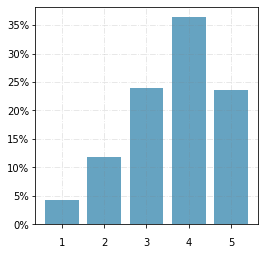

In [5]:
relative_frequencies_sum = relative_frequencies.sum(axis=1)/3
height = relative_frequencies_sum

bars = ('1', '2', '3', '4', '5')


# Figure Size
fig, ax= plt.subplots(figsize =(4, 4))


# Horizontal Bar Plot
ax.bar(bars, height,color=(0.0, 0.4, 0.6, 0.6))
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.9,
        alpha = 0.2)

    # Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 10)
ax.yaxis.set_tick_params(pad = 2)

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

plt.savefig('distribution.png')

plt.show()

In [6]:
height

1.0    0.042774
2.0    0.118853
3.0    0.239020
4.0    0.363915
5.0    0.235438
dtype: float64

In [7]:
my_parameter.describe()

,"1. Γίνεται συστηματική αξιολόγηση των αλλαγών που τίθενται σε εφαρμογή, βάσει δυσμενών συμβάντων που έχουν αναφερθεί.",3. Το προσωπικό ενημερώνεται συχνά για τα δυσμενή συμβάντα που λαμβάνουν χώρα.,5. Το προσωπικό συζητά τρόπους πρόληψης δυσμενών συμβάντων ώστε να μην επαναληφθούν.
count,242.000000,240.000000,241.000000
mean,3.177686,3.950000,3.763485
std,1.118237,1.005008,1.011432
min,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000
50%,3.000000,4.000000,4.000000
75%,4.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000


# Correlation Analysis

In [8]:
# individual score to parameter 

parameter = my_parameter

individualScore = parameter.sum(axis=1)/3


In [9]:
individualScore.describe()

count    244.000000
mean       3.584699
std        0.939224
min        0.000000
25%        3.000000
50%        3.666667
75%        4.333333
max        5.000000
dtype: float64

### Gender correlation

In [10]:
gender = hospitals_personalInfo['1. Φύλο: ']

In [11]:
# create a frame with gender and score
gender = pd.concat([gender,individualScore],axis=1)

gender = gender.dropna()

gender.columns = ['Gender','Score']

male = []
female = []


#create table for every category
for index, row in gender.iterrows(): 
    if row['Gender'] == 'Γυναίκα':
        female.append(row['Score'])
    else:
        male.append(row['Score'])
        

In [12]:
from statistics import mean, pvariance
avg1 = mean(male)
var1 = pvariance(male)
avg2 = mean(female)
var2 = pvariance(female)

print("avg male =", avg1,"var male =",var1,"avg female =", avg2,"var female =",var2 )

avg male = 3.3896713615023475 var male = 0.7792986400405563 avg female = 3.706114398422091 var female = 0.7413761578531719


In [13]:
tStat, pValue = stats.ttest_ind(female, male, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the

P-Value:0.01234746440350175 T-Statistic:2.5379854673384217


In [14]:
#create table for every category

# for index, row in gender.iterrows(): 
#     if row['Gender'] == 'Γυναίκα':
#         gender["Gender"].loc[index] = 0
#     elif row['Gender'] == 'Άνδρας':
#         gender["Gender"].loc[index] = 1

    

### Age Correlation

In [15]:
age = hospitals_personalInfo['2. Ηλικία…']

In [16]:
# create a frame with age and score
age = pd.concat([age,individualScore],axis=1)
age.columns = ['Age','Score']
age = age.dropna()

In [17]:
# remove outliers
q = age['Age'].quantile(0.99)
age = age[age['Age'] < q]

In [18]:

x = age['Age']
y = age['Score']
#calculation correlation coefficient and p-value between x and y
print("(corr,p-val) =",pearsonr(x, y))



(corr,p-val) = (0.20407390759712898, 0.0018653391570764575)


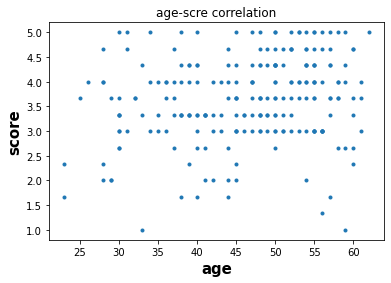

In [19]:
plt.plot(x, y, '.')
plt.title("age-scre correlation")
plt.xlabel("age",fontweight="bold", fontsize="15")
plt.ylabel("score",fontweight="bold", fontsize="15")

plt.show()

### Proffesion correlation

In [20]:
profession = hospitals_personalInfo['10. Τι θέση κατέχετε στο νοσοκομείο που εργάζεστε;']

profession= pd.concat([profession,individualScore],axis=1)

profession.columns = ['Profession','Score']

profession = profession.dropna()

In [21]:
print("Mean")
profession.groupby('Profession')['Score'].mean()

Mean


Profession
1. Ειδικευόμενος ιατρός    2.864198
2. Ειδικός ιατρός          3.438596
3. ΠΕ Νοσηλευτής           3.823529
4. ΤΕ Νοσηλευτής           3.778607
5. ΔΕ Βοηθός Νοσηλευτή     3.901961
Name: Score, dtype: float64

In [22]:
print("Variance")
profession.groupby('Profession')['Score'].var()

Variance


Profession
1. Ειδικευόμενος ιατρός    0.899652
2. Ειδικός ιατρός          0.667299
3. ΠΕ Νοσηλευτής           0.612745
4. ΤΕ Νοσηλευτής           0.706673
5. ΔΕ Βοηθός Νοσηλευτή     0.482843
Name: Score, dtype: float64

In [23]:
eidikevomenos_iatros = []
eidikos_iatros = []
pe_nosileftis = []
te_nosileftis = []
de_voithos_nosilefti = []

#create table for every category of profession
for index, row in profession.iterrows(): 
    if row['Profession'] == '1. Ειδικευόμενος ιατρός':
        eidikevomenos_iatros.append(row['Score'])
    elif row['Profession'] == '2. Ειδικός ιατρός':
        eidikos_iatros.append(row['Score'])
    elif row['Profession'] == '3. ΠΕ Νοσηλευτής':
        pe_nosileftis.append(row['Score'])
    elif row['Profession'] == '4. ΤΕ Νοσηλευτής':
        te_nosileftis.append(row['Score'])
    else:
        de_voithos_nosilefti.append(row['Score'])
        


In [24]:
f_oneway(eidikevomenos_iatros, eidikos_iatros, pe_nosileftis,te_nosileftis,de_voithos_nosilefti)

F_onewayResult(statistic=7.8856912092961435, pvalue=5.7097546709742624e-06)

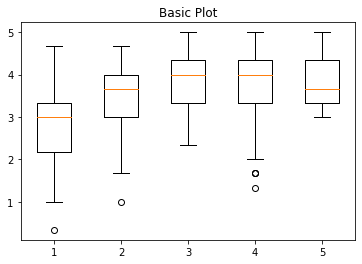

In [25]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot([eidikevomenos_iatros,eidikos_iatros,pe_nosileftis,te_nosileftis,de_voithos_nosilefti])

plt.show()



### Education Correlation

In [26]:
education = hospitals_personalInfo['3α. Ποια είναι η βασική σας εκπαίδευση;']

education= pd.concat([education,individualScore],axis=1)

education.columns = ['Education','Score']

education = education.dropna()

In [27]:
print("Mean")
education.groupby('Education')['Score'].mean()

Mean


Education
1. Δευτεροβάθμια (Δ.Ε.)     4.022222
2. Τεχνολογική (Τ.Ε.)       3.774580
3. Πανεπιστημιακή (Π.Ε.)    3.277108
Name: Score, dtype: float64

In [28]:
print("Variance")
education.groupby('Education')['Score'].var()

Variance


Education
1. Δευτεροβάθμια (Δ.Ε.)     0.420106
2. Τεχνολογική (Τ.Ε.)       0.654132
3. Πανεπιστημιακή (Π.Ε.)    0.891109
Name: Score, dtype: float64

In [29]:
defterovathmia = []
texnologiki = []
panepistimiaki = []


#create table for every category of profession
for index, row in education.iterrows(): 
    if row['Education'] == '1. Δευτεροβάθμια (Δ.Ε.)':
        defterovathmia.append(row['Score'])
    elif row['Education'] == '2. Τεχνολογική (Τ.Ε.)':
        texnologiki.append(row['Score'])
    elif row['Education'] == '3. Πανεπιστημιακή (Π.Ε.)':
        panepistimiaki.append(row['Score'])

        

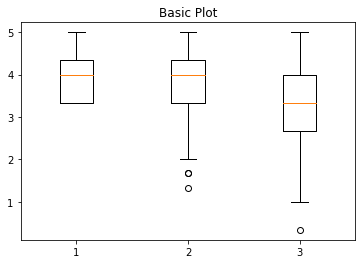

In [30]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot([defterovathmia,texnologiki,panepistimiaki])

plt.show()

In [31]:
f_oneway(defterovathmia,texnologiki,panepistimiaki)

F_onewayResult(statistic=10.718811636698339, pvalue=3.5150066705820515e-05)

### Adverse Event

In [32]:
aevent = hospitals_personalInfo['Τους τελευταίους 12 μήνες πόσα δυσμενή συμβάντα έχετε αναφέρει; (Αναφέρετε έναν αριθμό)']

In [33]:
# create a frame with age and score
aevent = pd.concat([aevent,individualScore],axis=1)
aevent.columns = ['aevent','Score']
aevent = aevent.dropna()

In [34]:
# remove outliers
q = aevent['aevent'].quantile(0.99)
aevent = aevent[aevent['aevent'] < q]

In [35]:

x = aevent['aevent']
y = aevent['Score']
#calculation correlation coefficient and p-value between x and y
print("(corr,p-val) =",pearsonr(x, y))


(corr,p-val) = (-0.1876903161503045, 0.007476496787120679)


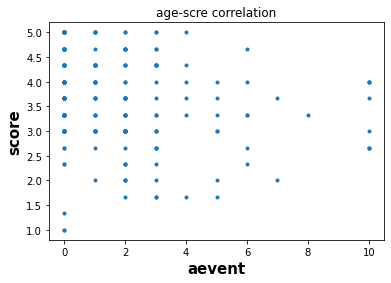

In [36]:
plt.plot(x, y, '.')
plt.title("age-scre correlation")
plt.xlabel("aevent",fontweight="bold", fontsize="15")
plt.ylabel("score",fontweight="bold", fontsize="15")

plt.show()

### Years of work in the team

In [37]:
wyears = hospitals_personalInfo['8. Πόσο χρονικό διάστημα εργάζεστε στη συγκεκριμένη μονάδα ?']

In [38]:
# create a frame with years and score
wyears = pd.concat([wyears,individualScore],axis=1)
wyears.columns = ['wyears','Score']
wyears = wyears.dropna()



In [39]:
# remove outlie
q = wyears['wyears'].quantile(0.99)
wyears = wyears[wyears['wyears'] < q]

In [40]:
x = wyears['wyears']
y = wyears['Score']
#calculation correlation coefficient and p-value between x and y
print("(corr,p-val) =",pearsonr(x, y))

(corr,p-val) = (0.06725306129929234, 0.3163169121504776)


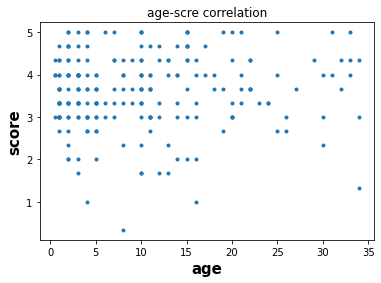

In [41]:
plt.plot(x, y, '.')
plt.title("age-scre correlation")
plt.xlabel("age",fontweight="bold", fontsize="15")
plt.ylabel("score",fontweight="bold", fontsize="15")

plt.show()

### Years of work in the hospital


In [42]:
wyears = hospitals_personalInfo['7. Πόσο χρονικό διάστημα εργάζεστε στο συγκεκριμένο Νοσοκομείο;']

In [43]:
# create a frame with years and score
wyears = pd.concat([wyears,individualScore],axis=1)
wyears.columns = ['wyears','Score']
wyears = wyears.dropna()



In [44]:
# remove outliers
q = wyears['wyears'].quantile(0.99)
wyears = wyears[wyears['wyears'] < q]

In [45]:
x = wyears['wyears']
y = wyears['Score']
#calculation correlation coefficient and p-value between x and y
print("(corr,p-val) =",pearsonr(x, y))

(corr,p-val) = (0.21984583082565018, 0.0007466457150107825)


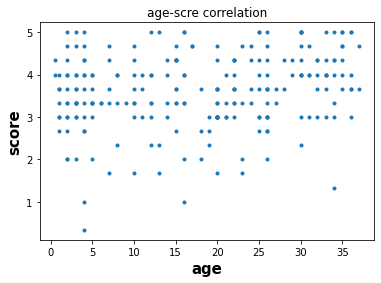

In [46]:
plt.plot(x, y, '.')
plt.title("age-scre correlation")
plt.xlabel("age",fontweight="bold", fontsize="15")
plt.ylabel("score",fontweight="bold", fontsize="15")

plt.show()

In [72]:
whours = hospitals_personalInfo['9. Συνήθως πόσες ώρες την εβδομάδα εργάζεστε στο συγκεκριμένο Νοσοκομείο; …']

In [73]:
# create a frame with hours and score
whours = pd.concat([whours,individualScore],axis=1)
whours.columns = ['whours','Score']
whours = whours.dropna()


In [74]:
whours

,whours,Score
0,23.0,1.666667
1,12.0,2.000000
2,60.0,4.000000
4,41.0,3.666667
5,52.0,3.666667
6,40.0,4.000000
7,40.0,4.333333
8,50.0,4.333333
9,45.0,3.666667
10,40.0,3.000000


In [75]:
# remove outliers
q = whours['whours'].quantile(0.99)
whours = whours[whours['whours'] < q]

whours

,whours,Score
0,23.0,1.666667
1,12.0,2.000000
2,60.0,4.000000
4,41.0,3.666667
5,52.0,3.666667
6,40.0,4.000000
7,40.0,4.333333
8,50.0,4.333333
9,45.0,3.666667
10,40.0,3.000000


In [76]:
x = whours['whours']
y = whours['Score']
#calculation correlation coefficient and p-value between x and y
print("(corr,p-val) =",pearsonr(x, y))

(corr,p-val) = (-0.046189039334047464, 0.48866363651432454)


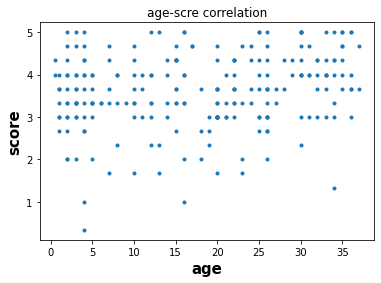

In [51]:
plt.plot(x, y, '.')
plt.title("age-scre correlation")
plt.xlabel("age",fontweight="bold", fontsize="15")
plt.ylabel("score",fontweight="bold", fontsize="15")

plt.show()

## Multivariant linear Regression for score and variables with evidece of correlation

In [52]:
hospitals_personalInfo

,Τους τελευταίους 12 μήνες πόσα δυσμενή συμβάντα έχετε αναφέρει; (Αναφέρετε έναν αριθμό),1. Φύλο:,2. Ηλικία…,3α. Ποια είναι η βασική σας εκπαίδευση;,3β. Άλλες σπουδές:,7. Πόσο χρονικό διάστημα εργάζεστε στο συγκεκριμένο Νοσοκομείο;,8. Πόσο χρονικό διάστημα εργάζεστε στη συγκεκριμένη μονάδα ?,9. Συνήθως πόσες ώρες την εβδομάδα εργάζεστε στο συγκεκριμένο Νοσοκομείο; …,10. Τι θέση κατέχετε στο νοσοκομείο που εργάζεστε;
0,4.0,Γυναίκα,23.0,3. Πανεπιστημιακή (Π.Ε.),3. Διδακτορικό δίπλωμα,23.0,12.0,23.0,4. ΤΕ Νοσηλευτής
1,NaN,Γυναίκα,45.0,3. Πανεπιστημιακή (Π.Ε.),2. Μεταπτυχιακές σπουδές,23.0,NaN,12.0,4. ΤΕ Νοσηλευτής
2,10.0,Άνδρας,55.0,2. Τεχνολογική (Τ.Ε.),3. Διδακτορικό δίπλωμα,33.0,3.0,60.0,4. ΤΕ Νοσηλευτής
3,NaN,Άνδρας,61.0,3. Πανεπιστημιακή (Π.Ε.),3. Διδακτορικό δίπλωμα,30.0,30.0,NaN,NaN
4,2.0,Άνδρας,50.0,2. Τεχνολογική (Τ.Ε.),2. Μεταπτυχιακές σπουδές,25.0,11.0,41.0,4. ΤΕ Νοσηλευτής
5,NaN,Γυναίκα,48.0,3. Πανεπιστημιακή (Π.Ε.),2. Μεταπτυχιακές σπουδές,15.0,15.0,52.0,2. Ειδικός ιατρός
6,6.0,Άνδρας,55.0,2. Τεχνολογική (Τ.Ε.),3. Διδακτορικό δίπλωμα,33.0,11.0,40.0,4. ΤΕ Νοσηλευτής
7,NaN,Γυναίκα,39.0,2. Τεχνολογική (Τ.Ε.),2. Μεταπτυχιακές σπουδές,10.0,9.0,40.0,4. ΤΕ Νοσηλευτής
8,NaN,Γυναίκα,40.0,2. Τεχνολογική (Τ.Ε.),2. Μεταπτυχιακές σπουδές,14.0,2.0,50.0,4. ΤΕ Νοσηλευτής
9,NaN,Γυναίκα,55.0,2. Τεχνολογική (Τ.Ε.),2. Μεταπτυχιακές σπουδές,26.0,3.0,45.0,4. ΤΕ Νοσηλευτής


In [53]:
data = hospitals_personalInfo[['1. Φύλο: ','2. Ηλικία…','Τους τελευταίους 12 μήνες πόσα δυσμενή συμβάντα έχετε αναφέρει; (Αναφέρετε έναν αριθμό)','7. Πόσο χρονικό διάστημα εργάζεστε στο συγκεκριμένο Νοσοκομείο;','10. Τι θέση κατέχετε στο νοσοκομείο που εργάζεστε;','9. Συνήθως πόσες ώρες την εβδομάδα εργάζεστε στο συγκεκριμένο Νοσοκομείο; …']]
data = pd.concat((data, individualScore), axis=1)
data.columns = ['gender','age','aevent','yearsHospital','position','hours','score']


In [54]:
#clean data
data = data.dropna()
data

,gender,age,aevent,yearsHospital,position,hours,score
0,Γυναίκα,23.0,4.0,23.0,4. ΤΕ Νοσηλευτής,23.0,1.666667
2,Άνδρας,55.0,10.0,33.0,4. ΤΕ Νοσηλευτής,60.0,4.000000
4,Άνδρας,50.0,2.0,25.0,4. ΤΕ Νοσηλευτής,41.0,3.666667
6,Άνδρας,55.0,6.0,33.0,4. ΤΕ Νοσηλευτής,40.0,4.000000
12,Άνδρας,51.0,2.0,25.0,4. ΤΕ Νοσηλευτής,40.0,3.000000
13,Γυναίκα,54.0,2.0,30.0,4. ΤΕ Νοσηλευτής,40.0,4.666667
14,Γυναίκα,57.0,2.0,35.0,4. ΤΕ Νοσηλευτής,40.0,3.666667
15,Γυναίκα,52.0,3.0,20.0,3. ΠΕ Νοσηλευτής,40.0,4.666667
17,Άνδρας,50.0,3.0,30.0,4. ΤΕ Νοσηλευτής,40.0,4.000000
18,Άνδρας,53.0,10.0,30.0,4. ΤΕ Νοσηλευτής,60.0,4.000000


In [55]:
#remove outliers
q1 = data['aevent'].quantile(0.99)
data = data.loc[data['aevent'] < q1]

q2 = data['yearsHospital'].quantile(0.99)
data = data.loc[data['yearsHospital'] < q2]

q3 = data['hours'].quantile(0.99)
data = data.loc[data['hours'] < q2]

print(q3)

75.0


In [56]:
#make categorical values binary

dummies = pd.get_dummies(data['gender'])
data = pd.concat((data, dummies), axis=1)

dummies = pd.get_dummies(data['position'])
data = pd.concat((data, dummies), axis=1)


In [57]:
data

,gender,age,aevent,yearsHospital,position,hours,score,Άνδρας,Γυναίκα,1. Ειδικευόμενος ιατρός,2. Ειδικός ιατρός,4. ΤΕ Νοσηλευτής,5. ΔΕ Βοηθός Νοσηλευτή
0,Γυναίκα,23.0,4.0,23.0,4. ΤΕ Νοσηλευτής,23.0,1.666667,0,1,0,0,1,0
26,Γυναίκα,48.0,0.0,15.0,4. ΤΕ Νοσηλευτής,7.0,4.666667,0,1,0,0,1,0
50,Γυναίκα,40.0,1.0,12.0,4. ΤΕ Νοσηλευτής,25.0,5.000000,0,1,0,0,1,0
96,Γυναίκα,46.0,6.0,10.0,2. Ειδικός ιατρός,35.0,3.333333,0,1,0,1,0,0
103,Γυναίκα,38.0,2.0,10.0,4. ΤΕ Νοσηλευτής,8.0,1.666667,0,1,0,0,1,0
129,Άνδρας,51.0,1.0,27.0,4. ΤΕ Νοσηλευτής,24.0,3.333333,1,0,0,0,1,0
142,Γυναίκα,35.0,2.0,1.0,1. Ειδικευόμενος ιατρός,10.0,3.000000,0,1,1,0,0,0
150,Γυναίκα,45.0,2.0,9.0,2. Ειδικός ιατρός,36.0,3.333333,0,1,0,1,0,0
154,Γυναίκα,37.0,0.0,7.0,2. Ειδικός ιατρός,16.0,3.333333,0,1,0,1,0,0
164,Άνδρας,30.0,2.0,4.0,1. Ειδικευόμενος ιατρός,35.0,2.666667,1,0,1,0,0,0


In [58]:
# build model
X = data[['age','Άνδρας','aevent','1. Ειδικευόμενος ιατρός','hours']]
y = data['score']

In [59]:
#ols model
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     2.646
Date:                Thu, 02 Feb 2023   Prob (F-statistic):             0.0776
Time:                        10:58:58   Log-Likelihood:                -17.947
No. Observations:                  18   AIC:                             47.89
Df Residuals:                      12   BIC:                             53.24
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

/Users/stathis/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
